<a href="https://colab.research.google.com/github/Fvargasv/Challenge-Telecom-X-Parte-2/blob/main/Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparación de los datos

##Extracción del archivo tratado

In [63]:
import pandas as pd

datos = pd.read_csv("/content/datos_telecomx_parte2.csv")
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Dayly
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


##Eliminación de columnas irrelevantes

In [64]:
datos.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Charges_Dayly'],
      dtype='object')

In [65]:
#Eliminamos la columna customerID, ya que no entrega información útil que influya en la decisión de quedarse o irse de la compañía
datos = datos.drop(['customerID'], axis=1)
datos.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Dayly
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


##Reducir redundancia

Se limpiarán los datos agrupando algunos valores de las variables, ya que se detectaron correlaciones de 1 en muchas variables, al hacer el encoding antes de separar las variables explicativas (X) de la objetivo (y)

In [67]:
datos_clean = datos.copy()
datos_clean.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Dayly
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [68]:
cols_to_fix = ['internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies']

In [69]:
for col in cols_to_fix:
  datos_clean[col] = datos_clean[col].replace({'No internet service': 'No'})


In [70]:
#verificamos si hay valores únicos en cada columna
for col in datos_clean.columns:
  print(f"Valores únicos en la columna'{col}': {datos_clean[col].nunique()}")
  print(datos_clean[col].unique())
  print('-'*60)

Valores únicos en la columna'Churn': 2
[0 1]
------------------------------------------------------------
Valores únicos en la columna'customer_gender': 2
['Female' 'Male']
------------------------------------------------------------
Valores únicos en la columna'customer_SeniorCitizen': 2
[0 1]
------------------------------------------------------------
Valores únicos en la columna'customer_Partner': 2
[1 0]
------------------------------------------------------------
Valores únicos en la columna'customer_Dependents': 2
[1 0]
------------------------------------------------------------
Valores únicos en la columna'customer_tenure': 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
------------------------------------------------------------
Valores únicos en la columna'phone_PhoneService': 2
[1 0]
-------------

In [71]:
datos_clean.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Dayly
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


##Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.




In [90]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [72]:
columnas = datos_clean.columns
columnas

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Charges_Dayly'],
      dtype='object')

In [73]:
columnas_categoricas = datos.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['customer_gender', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [38]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                  ['customer_gender', 'phone_MultipleLines', 'internet_InternetService',
                                   'internet_OnlineSecurity', 'internet_OnlineBackup',
                                    'internet_DeviceProtection', 'internet_TechSupport',
                                    'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
                                    'PaymentMethod']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [74]:
datos= one_hot.fit_transform(datos_clean)

In [75]:
datos=pd.DataFrame(datos, columns=one_hot.get_feature_names_out(columnas))
datos.head()

,onehotencoder__customer_gender_Male,onehotencoder__phone_MultipleLines_No,onehotencoder__phone_MultipleLines_No phone service,onehotencoder__phone_MultipleLines_Yes,onehotencoder__internet_InternetService_DSL,onehotencoder__internet_InternetService_Fiber optic,onehotencoder__internet_InternetService_No,onehotencoder__internet_OnlineSecurity_Yes,onehotencoder__internet_OnlineBackup_Yes,onehotencoder__internet_DeviceProtection_Yes,...,remainder__Churn,remainder__customer_SeniorCitizen,remainder__customer_Partner,remainder__customer_Dependents,remainder__customer_tenure,remainder__phone_PhoneService,remainder__PaperlessBilling,remainder__Charges_Monthly,remainder__Charges_Total,remainder__Charges_Dayly
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.6,593.30,2.186667
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,1.0,0.0,59.9,542.40,1.996667
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.9,280.85,2.463333
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.0,1237.85,3.266667
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.9,267.40,2.796667


In [91]:
#Se cambia el nombre de las columnas para mejor comprensión
datos.columns.to_list()

['onehotencoder__customer_gender_Male',
 'onehotencoder__phone_MultipleLines_No',
 'onehotencoder__phone_MultipleLines_No phone service',
 'onehotencoder__phone_MultipleLines_Yes',
 'onehotencoder__internet_InternetService_DSL',
 'onehotencoder__internet_InternetService_Fiber optic',
 'onehotencoder__internet_InternetService_No',
 'onehotencoder__internet_OnlineSecurity_Yes',
 'onehotencoder__internet_OnlineBackup_Yes',
 'onehotencoder__internet_DeviceProtection_Yes',
 'onehotencoder__internet_TechSupport_Yes',
 'onehotencoder__internet_StreamingTV_Yes',
 'onehotencoder__internet_StreamingMovies_Yes',
 'onehotencoder__Contract_Month-to-month',
 'onehotencoder__Contract_One year',
 'onehotencoder__Contract_Two year',
 'onehotencoder__PaymentMethod_Bank transfer (automatic)',
 'onehotencoder__PaymentMethod_Credit card (automatic)',
 'onehotencoder__PaymentMethod_Electronic check',
 'onehotencoder__PaymentMethod_Mailed check',
 'remainder__Churn',
 'remainder__customer_SeniorCitizen',
 'r

In [92]:
new_columns = ['customer_gender_Male',
 'phone_MultipleLines_No',
 'phone_MultipleLines_No phone service',
 'phone_MultipleLines_Yes',
 'internet_InternetService_DSL',
 'internet_InternetService_Fiber optic',
 'internet_InternetService_No',
 'internet_OnlineSecurity_Yes',
 'internet_OnlineBackup_Yes',
 'internet_DeviceProtection_Yes',
 'internet_TechSupport_Yes',
 'internet_StreamingTV_Yes',
 'internet_StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'PaperlessBilling',
 'Charges_Monthly',
 'Charges_Total',
 'Charges_Dayly']

In [93]:
datos.columns = ['customer_gender_Male',
 'phone_MultipleLines_No',
 'phone_MultipleLines_No phone service',
 'phone_MultipleLines_Yes',
 'internet_InternetService_DSL',
 'internet_InternetService_Fiber optic',
 'internet_InternetService_No',
 'internet_OnlineSecurity_Yes',
 'internet_OnlineBackup_Yes',
 'internet_DeviceProtection_Yes',
 'internet_TechSupport_Yes',
 'internet_StreamingTV_Yes',
 'internet_StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'PaperlessBilling',
 'Charges_Monthly',
 'Charges_Total',
 'Charges_Dayly']
datos.head()

,customer_gender_Male,phone_MultipleLines_No,phone_MultipleLines_No phone service,phone_MultipleLines_Yes,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No,internet_OnlineSecurity_Yes,internet_OnlineBackup_Yes,internet_DeviceProtection_Yes,...,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,Charges_Dayly
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.6,593.30,2.186667
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,1.0,0.0,59.9,542.40,1.996667
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.9,280.85,2.463333
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.0,1237.85,3.266667
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.9,267.40,2.796667


In [94]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_gender_Male                     7032 non-null   float64
 1   phone_MultipleLines_No                   7032 non-null   float64
 2   phone_MultipleLines_No phone service     7032 non-null   float64
 3   phone_MultipleLines_Yes                  7032 non-null   float64
 4   internet_InternetService_DSL             7032 non-null   float64
 5   internet_InternetService_Fiber optic     7032 non-null   float64
 6   internet_InternetService_No              7032 non-null   float64
 7   internet_OnlineSecurity_Yes              7032 non-null   float64
 8   internet_OnlineBackup_Yes                7032 non-null   float64
 9   internet_DeviceProtection_Yes            7032 non-null   float64
 10  internet_TechSupport_Yes                 7032 non-nul

In [96]:
print(datos.isna().sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [97]:
print(datos.isnull().sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [98]:
#botamos los registros que tienen datos nulos, ya que son sólo 11
datos = datos.dropna()

In [99]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_gender_Male                     7032 non-null   float64
 1   phone_MultipleLines_No                   7032 non-null   float64
 2   phone_MultipleLines_No phone service     7032 non-null   float64
 3   phone_MultipleLines_Yes                  7032 non-null   float64
 4   internet_InternetService_DSL             7032 non-null   float64
 5   internet_InternetService_Fiber optic     7032 non-null   float64
 6   internet_InternetService_No              7032 non-null   float64
 7   internet_OnlineSecurity_Yes              7032 non-null   float64
 8   internet_OnlineBackup_Yes                7032 non-null   float64
 9   internet_DeviceProtection_Yes            7032 non-null   float64
 10  internet_TechSupport_Yes                 7032 non-nul

In [100]:
#Verificación datos nulos
print(datos.isnull().sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [101]:
#verificación de datos infinitos
import numpy as np
print(np.isinf(datos).sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [102]:
#Varificación String vacias
print((datos=='').sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [103]:
#Verificación String espacios
print((datos==' ').sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

##Análisis de correlación

<Axes: >

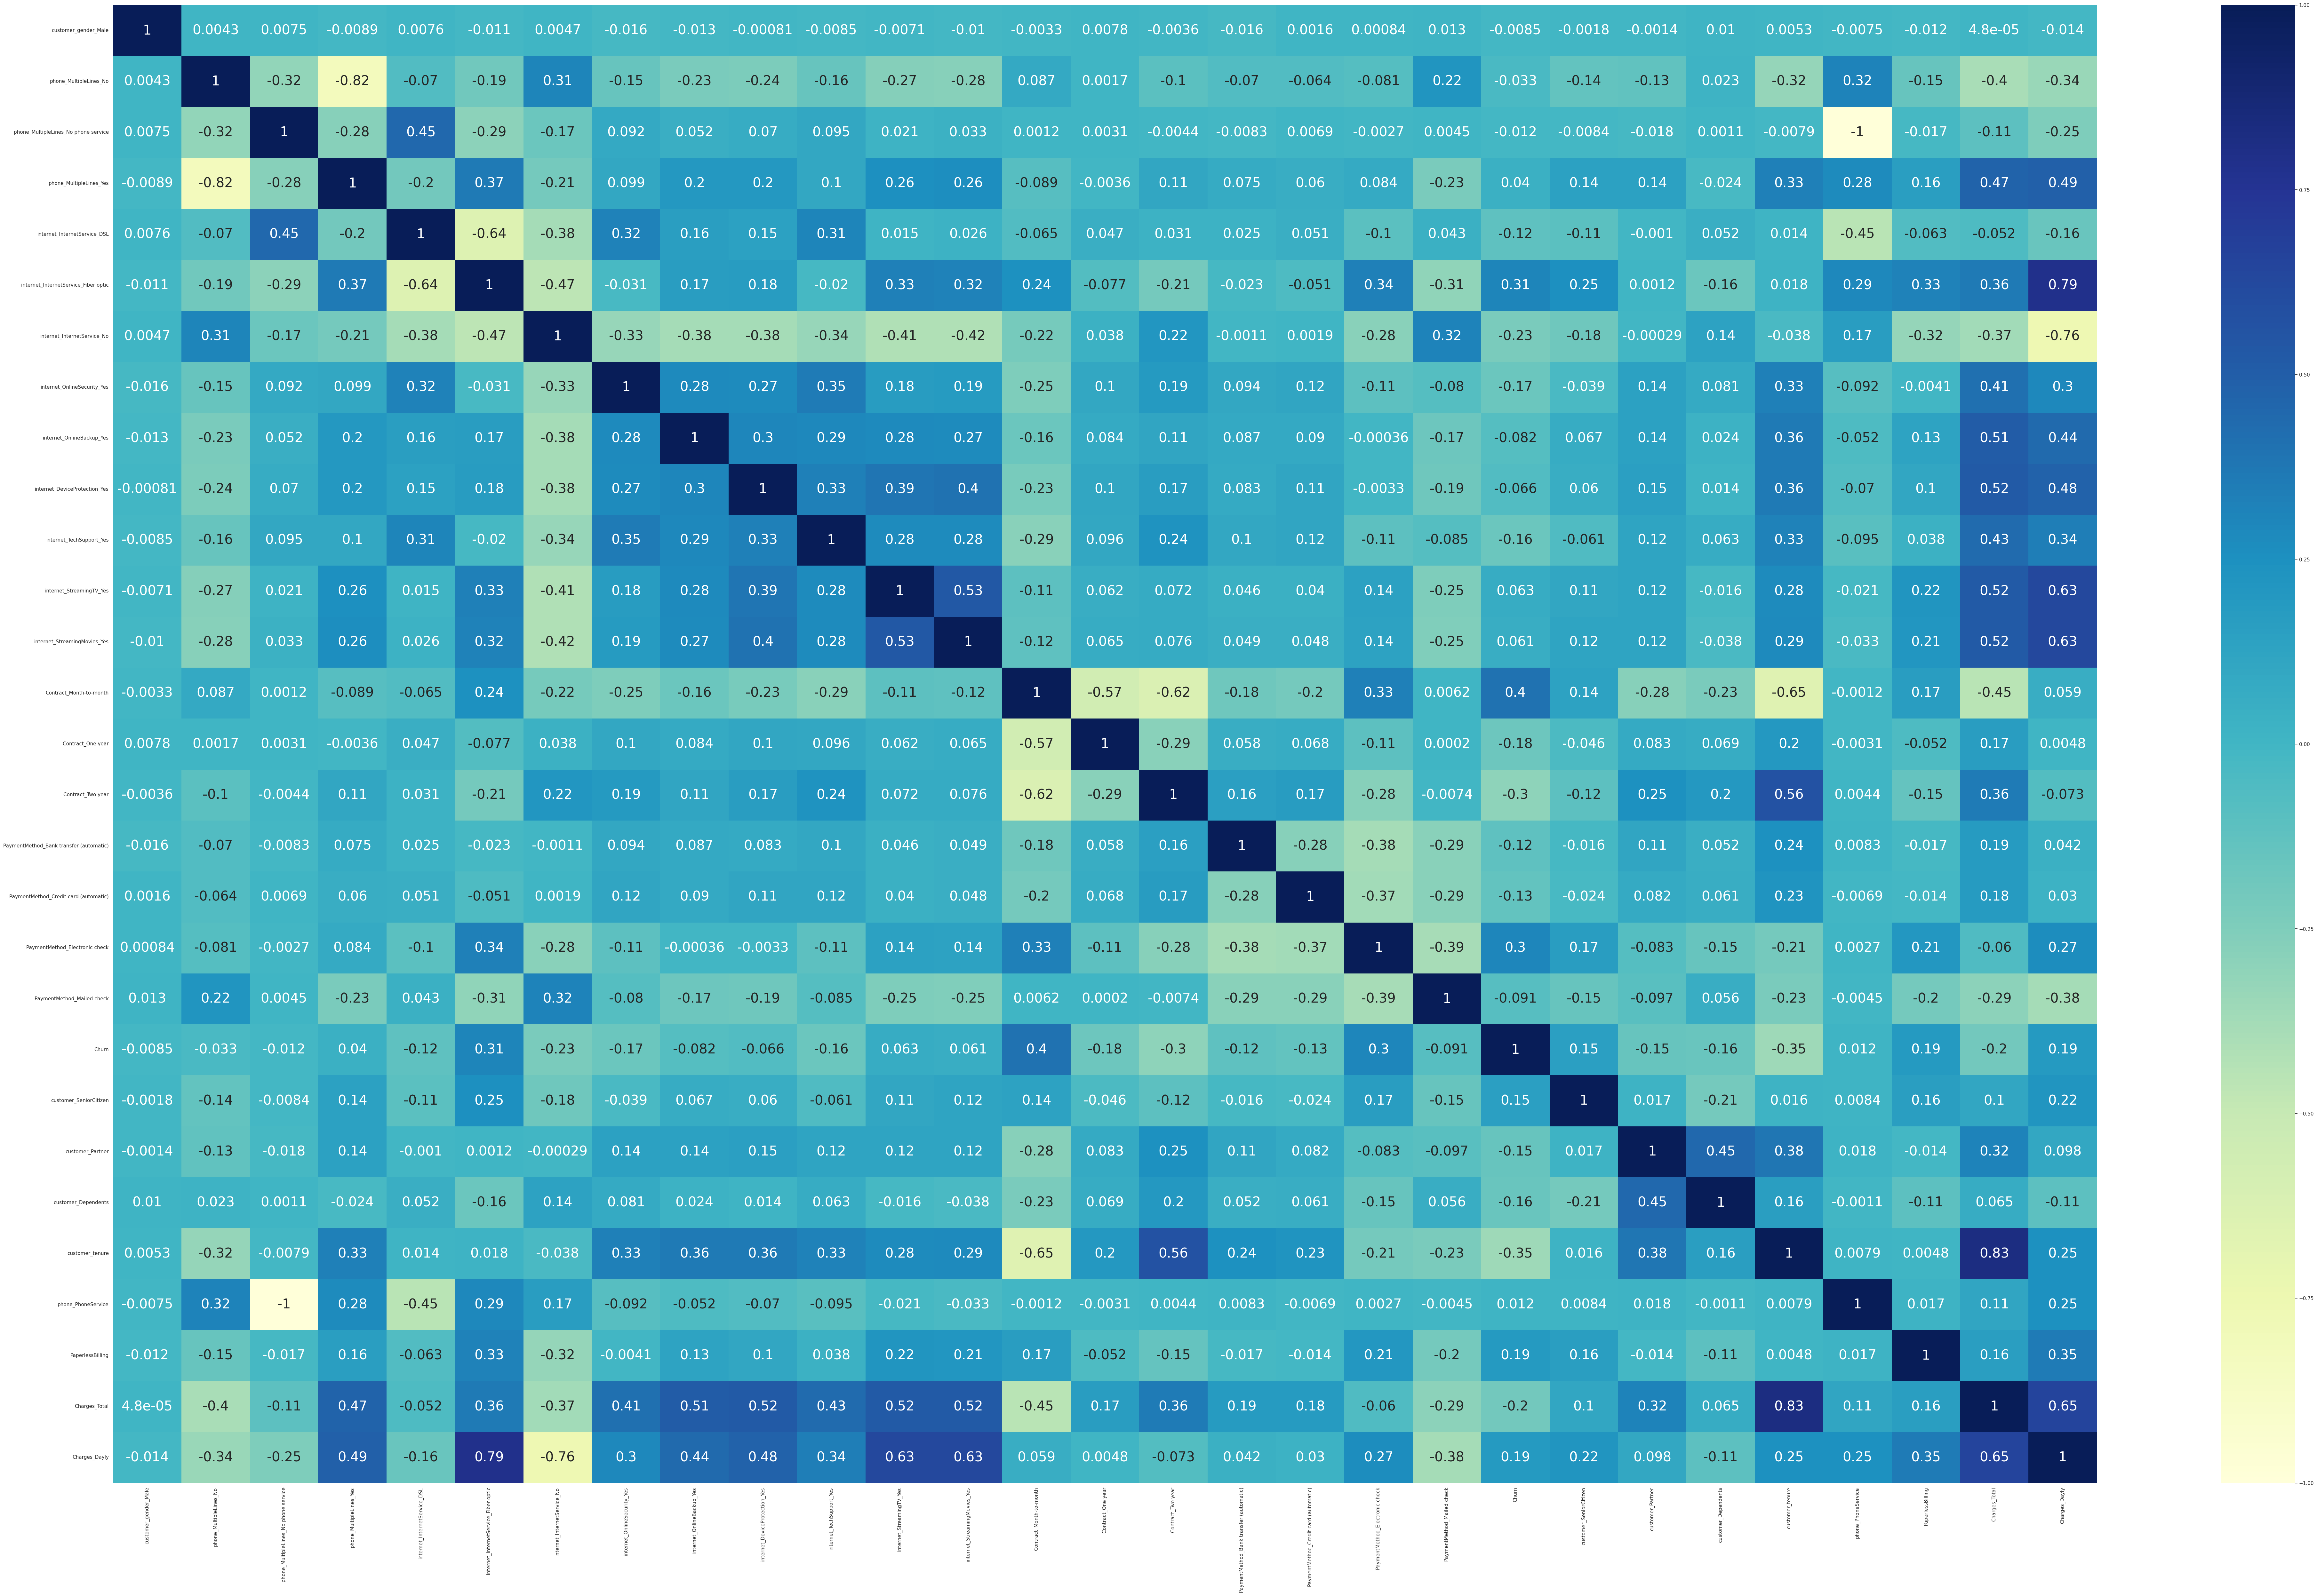

In [142]:
import seaborn as sns
sns.set(rc={'figure.figsize':(100,60)})
sns.heatmap(datos.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 30})

##Análisis de multicolinearidad entre variables

In [106]:
datos[['Charges_Dayly','Charges_Monthly']].corr()

,Charges_Dayly,Charges_Monthly
Charges_Dayly,1.0,1.0
Charges_Monthly,1.0,1.0


In [107]:
#la variables 'Charges_Dayly'y 'Charges_Monthly' están correlacionadas perfectamente,por lo que debo eliminar 1 para evitar multicolinearidad
datos = datos.drop(['Charges_Monthly'], axis=1)
datos.head()

,customer_gender_Male,phone_MultipleLines_No,phone_MultipleLines_No phone service,phone_MultipleLines_Yes,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No,internet_OnlineSecurity_Yes,internet_OnlineBackup_Yes,internet_DeviceProtection_Yes,...,PaymentMethod_Mailed check,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,PaperlessBilling,Charges_Total,Charges_Dayly
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,9.0,1.0,1.0,593.30,2.186667
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,542.40,1.996667
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,280.85,2.463333
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,13.0,1.0,1.0,1237.85,3.266667
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,267.40,2.796667


In [108]:
datos.corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
Contract_Month-to-month,0.404565
internet_InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
Charges_Dayly,0.192858
PaperlessBilling,0.191454
customer_SeniorCitizen,0.150541
internet_StreamingTV_Yes,0.063254
internet_StreamingMovies_Yes,0.060860
phone_MultipleLines_Yes,0.040033


##Variables explicativas y variable respuesta

In [109]:
X= datos.drop(['Churn'], axis=1)
y= datos['Churn']

In [110]:
X

,customer_gender_Male,phone_MultipleLines_No,phone_MultipleLines_No phone service,phone_MultipleLines_Yes,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No,internet_OnlineSecurity_Yes,internet_OnlineBackup_Yes,internet_DeviceProtection_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,PaperlessBilling,Charges_Total,Charges_Dayly
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,9.0,1.0,1.0,593.30,2.186667
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,542.40,1.996667
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,280.85,2.463333
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,13.0,1.0,1.0,1237.85,3.266667
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,13.0,1.0,0.0,742.90,1.838333
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,22.0,1.0,1.0,1873.70,2.836667
7040,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,92.75,1.676667
7041,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,67.0,1.0,0.0,4627.65,2.261667


In [111]:
y

,Churn
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
7038,0.0
7039,1.0
7040,0.0
7041,0.0


In [19]:
# utiliza el método LabelEncoder para realizar la transformación de
# la variable churn, ya que es CATEGORICA

#from sklearn.preprocessing import LabelEncoder

In [20]:
#label_encoder = LabelEncoder()

In [21]:
#y = label_encoder.fit_transform(y)

In [22]:
#y

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
#y.dtype

dtype('int64')

##Verificación de la Proporción de Cancelación (Churn)

In [112]:
datos['Churn'].value_counts()

,count
Churn,
0.0,5163
1.0,1869


In [113]:
datos['Churn'].value_counts(normalize=True).round(2)

,proportion
Churn,
0.0,0.73
1.0,0.27


Se ve que hay un desbalance entre la proporción de clientes que cancelaron (27%) vs los que permanecen activos (73%)

##Balanceo de Clases

Se usará oversampling con el método SMOTE

In [132]:
from imblearn.over_sampling import SMOTE

In [136]:
oversampling = SMOTE(random_state=42)
X_balanceado, y_balanceado = oversampling.fit_resample(X,y)

In [137]:
y_balanceado.value_counts()

,count
Churn,
0.0,5163
1.0,5163


In [138]:
y_balanceado

,Churn
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
10321,1.0
10322,1.0
10323,1.0
10324,1.0


##Normalización

Some algorithms that need data on the same scale: KNN (K-Nearest Neighbors), Neural Networks, Linear Regression, Logistic Regression and SVM.

Some algorithms that do not need data on the same scale: Decision Trees, Random Forest, AdaBoost, Naïve Bayes, etc.

Se utilizarán 3 modelos KNN, Decision Trees y Random Forest, por lo que se normalizarán los datos para usar KNN, esto debido a la diferencia de escala entre variables con valores 0 y 1 y la variable Charges_Total que tiene un máximo de 8684.

Para los modelos, se utilizarán datos sin normalizar

In [122]:
datos.describe()

,customer_gender_Male,phone_MultipleLines_No,phone_MultipleLines_No phone service,phone_MultipleLines_Yes,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No,internet_OnlineSecurity_Yes,internet_OnlineBackup_Yes,internet_DeviceProtection_Yes,...,PaymentMethod_Mailed check,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,PaperlessBilling,Charges_Total,Charges_Dayly
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.481371,0.096701,0.421928,0.343572,0.440273,0.216155,0.286547,0.344852,0.343857,...,0.228100,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,2283.300441,2.159940
std,0.500014,0.499688,0.295571,0.493902,0.474934,0.496455,0.411650,0.452180,0.475354,0.475028,...,0.419637,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,401.450000,1.186250
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1397.475000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,8684.800000,3.958333


In [123]:
#normalización de la base de datos usando el MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler

In [139]:
normalizacion = MinMaxScaler()
X_balanceado_normalizado = normalizacion.fit_transform(X_balanceado)

In [141]:
X_balanceado_normalizado = pd.DataFrame(X_balanceado_normalizado)
X_balanceado_normalizado.columns = ['customer_gender_Male',
 'phone_MultipleLines_No',
 'phone_MultipleLines_No phone service',
 'phone_MultipleLines_Yes',
 'internet_InternetService_DSL',
 'internet_InternetService_Fiber optic',
 'internet_InternetService_No',
 'internet_OnlineSecurity_Yes',
 'internet_OnlineBackup_Yes',
 'internet_DeviceProtection_Yes',
 'internet_TechSupport_Yes',
 'internet_StreamingTV_Yes',
 'internet_StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'PaperlessBilling',
 'Charges_Total',
 'Charges_Dayly']
X_balanceado_normalizado.head()

,customer_gender_Male,phone_MultipleLines_No,phone_MultipleLines_No phone service,phone_MultipleLines_Yes,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No,internet_OnlineSecurity_Yes,internet_OnlineBackup_Yes,internet_DeviceProtection_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,PaperlessBilling,Charges_Total,Charges_Dayly
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.112676,1.0,1.0,0.066294,0.471144
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.112676,1.0,0.0,0.060420,0.414428
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.042254,1.0,1.0,0.030239,0.553731
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.169014,1.0,1.0,0.140670,0.793532
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.028169,1.0,1.0,0.028687,0.653234


#Correlación y Selección de Variables

##Análisis de Correlación

Este análisis fue realiado algunos pasos antes, debido a la fuerte colinealidad encontrada en las variables 'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies'

##Análisis Dirigido

Se investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

/tmp/ipython-input-3424777825.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x="Churn", y="customer_tenure", palette="Set2")


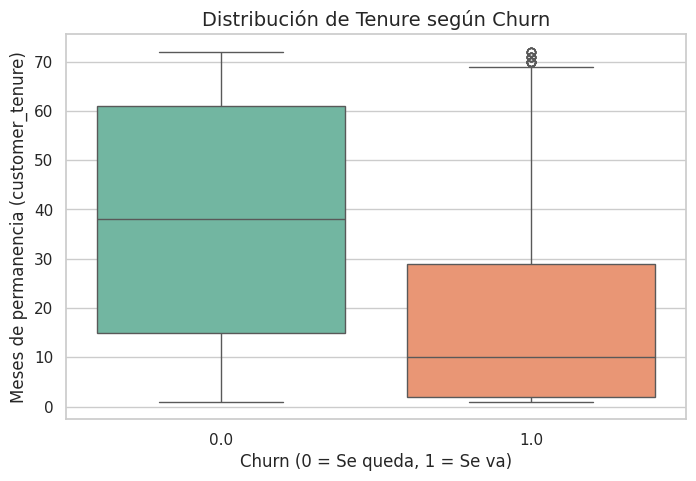

In [146]:
import matplotlib.pyplot as plt

# Ajustes generales de estilo
sns.set(style="whitegrid")

# --- 1. Boxplot: Churn vs customer_tenure ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos, x="Churn", y="customer_tenure", palette="Set2")
plt.title("Distribución de Tenure según Churn", fontsize=14)
plt.xlabel("Churn (0 = Se queda, 1 = Se va)")
plt.ylabel("Meses de permanencia (customer_tenure)")
plt.show()


Se observa que del gráfico Distribución de Tenure según Churn, el 75% de los clientes que se van, tienen hasta 29 meses de permanencia en la compañía, lo que sugiere que probablemente la estrategia de retención de clientes debería estar enfocada a los que tienen menos tiempo en la compañía.

/tmp/ipython-input-2553695704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x="Churn", y="Charges_Total", palette="Set2")


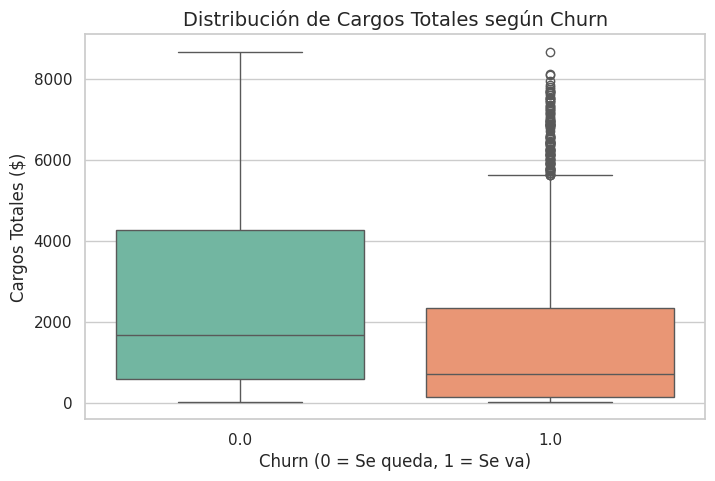

In [147]:
# --- 2. Boxplot: Churn vs Charges_Total ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos, x="Churn", y="Charges_Total", palette="Set2")
plt.title("Distribución de Cargos Totales según Churn", fontsize=14)
plt.xlabel("Churn (0 = Se queda, 1 = Se va)")
plt.ylabel("Cargos Totales ($)")
plt.show()

/tmp/ipython-input-2048597239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x="Churn", y="Charges_Dayly", palette="Set2")


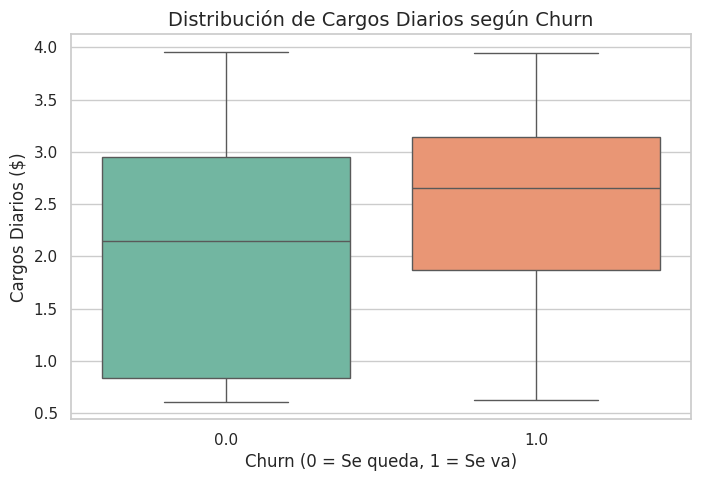

In [151]:
# --- 3. Boxplot: Churn vs Charges_Dayly ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos, x="Churn", y="Charges_Dayly", palette="Set2")
plt.title("Distribución de Cargos Diarios según Churn", fontsize=14)
plt.xlabel("Churn (0 = Se queda, 1 = Se va)")
plt.ylabel("Cargos Diarios ($)")
plt.show()

Se observa que los clientes que se van, tienen una mediana de cobro diario más alta que los clientes que se quedan y el 25% de los clientes que se van pagan diariamente \$1.9 vs el 25% de los que se quedan que pagan diariamente hasta \$0.8. Por lo que se podría inferir, que los clientes que se van diariamente están pagando más y quizás sea bueno enfocar la estrategia de retención asociada la disminución del cobro diario de los clientes más nuevos y así retenerlos.

Una propuesta podría ser cobrar más barato por un período determinado de tiempo y luego cobrar el precio normal por los servicios.

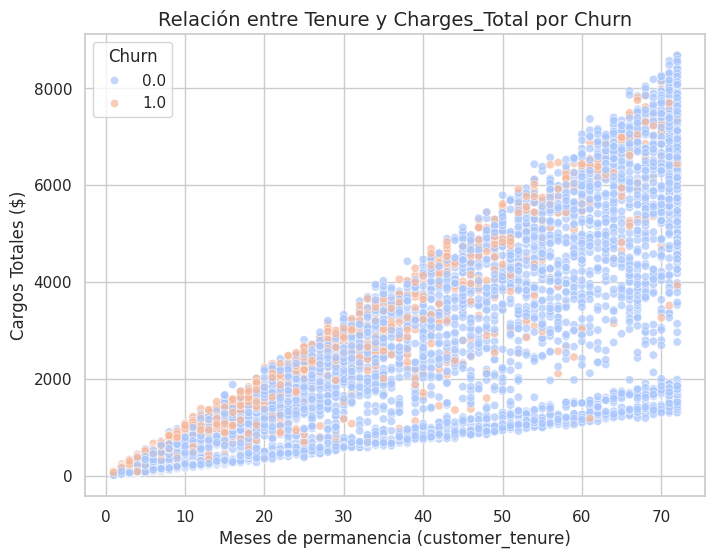

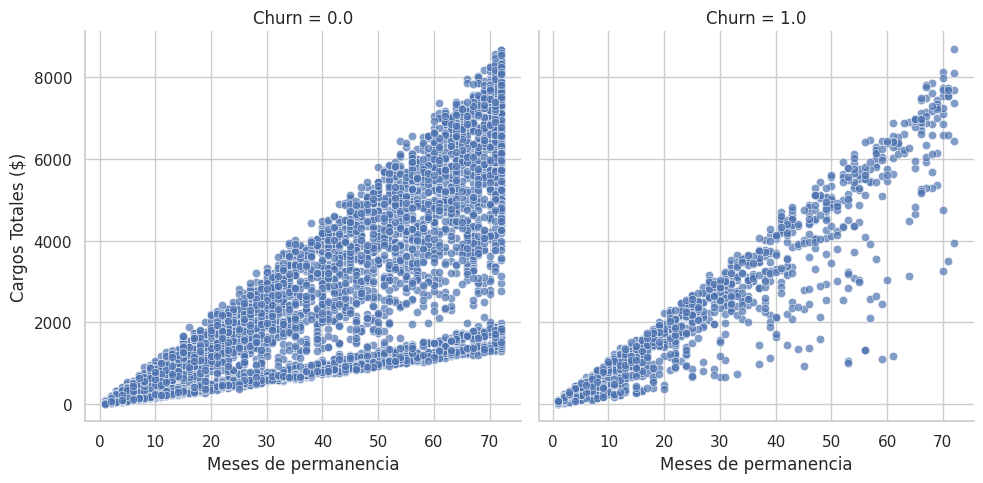

In [152]:
# --- 4. Gráfico de dispersión: customer_tenure vs Charges_Total con color por Churn ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=datos,
    x="customer_tenure",
    y="Charges_Total",
    hue="Churn",
    palette="coolwarm",
    alpha=0.7
)
plt.title("Relación entre Tenure y Charges_Total por Churn", fontsize=14)
plt.xlabel("Meses de permanencia (customer_tenure)")
plt.ylabel("Cargos Totales ($)")
plt.legend(title="Churn")
plt.show()

# --- 4. Scatterplot separado por Churn (facetas) ---
g = sns.FacetGrid(datos, col="Churn", height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x="customer_tenure", y="Charges_Total", alpha=0.7)
g.set_axis_labels("Meses de permanencia", "Cargos Totales ($)")
g.set_titles("Churn = {col_name}")
plt.show()

#Modelado predictivo

##Separación de datos

In [153]:
#Separacion de los datos entre conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_balanceado, y_balanceado, stratify =y_balanceado, random_state=5)

In [155]:
#Se crea un modelo base con el DummyClassifier y se da la tasa de acierto con el método score.
from sklearn.dummy import DummyClassifier

In [156]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.5